In [105]:
import pandas as pd
import datetime

In [320]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [314]:
from sklearn import tree, ensemble

from sklearn import metrics
from sklearn import model_selection
from sklearn import cross_validation
from sklearn import feature_selection

In [3]:
# data 
data = pd.read_csv("./data/melb_data.csv")

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [4]:
print(data.head())

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode      ...       Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0      ...            1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0      ...            1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0      ...            2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0      ...            2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0      ...            1.0  2.0     120.0   

   BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0           NaN        NaN        Yarra  -37.

In [5]:
print(data.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241   

In [97]:
seller_g = data['SellerG'].unique().tolist()
# print(seller_g)
for sg in seller_g:
    data[sg] = data['SellerG'].map(lambda x: 1 if x==sg else 0)

In [98]:
print(data[seller_g].head())
print(data[seller_g].describe())

   Biggin  Nelson  Jellis  Greg  LITTLE  Collins  Kay  Beller  Marshall  Brad  \
0       1       0       0     0       0        0    0       0         0     0   
1       1       0       0     0       0        0    0       0         0     0   
2       1       0       0     0       0        0    0       0         0     0   
3       1       0       0     0       0        0    0       0         0     0   
4       0       1       0     0       0        0    0       0         0     0   

   ...    Roger  Follett  Le  Joseph  Boutique  Area  SN  PRD  Rexhepi  Point  
0  ...        0        0   0       0         0     0   0    0        0      0  
1  ...        0        0   0       0         0     0   0    0        0      0  
2  ...        0        0   0       0         0     0   0    0        0      0  
3  ...        0        0   0       0         0     0   0    0        0      0  
4  ...        0        0   0       0         0     0   0    0        0      0  

[5 rows x 268 columns]
         

In [21]:
print("Data with Null Fields")
print(data.isnull().sum())
null_columns = []
for col in data.columns.tolist():
    if data[col].isnull().sum():
        null_columns.append(col)

Data with Null Fields
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [22]:
print(null_columns)

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']


In [67]:
suburbs = data['Suburb'].unique().tolist()
# print(suburbs)
for suburb in suburbs:
    data[suburb] = data['Suburb'].map(lambda x: 1 if x==suburb else 0)

In [68]:
print(data[suburbs].head())

   Abbotsford  Airport West  Albert Park  Alphington  Altona  Altona North  \
0           1             0            0           0       0             0   
1           1             0            0           0       0             0   
2           1             0            0           0       0             0   
3           1             0            0           0       0             0   
4           1             0            0           0       0             0   

   Armadale  Ascot Vale  Ashburton  Ashwood   ...     Yarra Glen  Brookfield  \
0         0           0          0        0   ...              0           0   
1         0           0          0        0   ...              0           0   
2         0           0          0        0   ...              0           0   
3         0           0          0        0   ...              0           0   
4         0           0          0        0   ...              0           0   

   Emerald  Whittlesea  Burnside  Attwood  Wallan 

In [86]:
methods = data['Method'].unique().tolist()
print(methods)
for method in methods:
    data[method] = data['Method'].map(lambda x: 1 if x==method else 0)

['S', 'SP', 'PI', 'VB', 'SA']


In [89]:
print(data[methods].head())
print(data[methods].describe())

   S  SP  PI  VB  SA
0  1   0   0   0   0
1  1   0   0   0   0
2  0   1   0   0   0
3  0   0   1   0   0
4  0   0   0   1   0
                  S            SP            PI            VB            SA
count  13580.000000  13580.000000  13580.000000  13580.000000  13580.000000
mean       0.664359      0.125405      0.115169      0.088292      0.006775
std        0.472231      0.331190      0.319238      0.283729      0.082032
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        1.000000      0.000000      0.000000      0.000000      0.000000
75%        1.000000      0.000000      0.000000      0.000000      0.000000
max        1.000000      1.000000      1.000000      1.000000      1.000000


In [125]:
# print(data['Date'])
data['Datetime_Date'] = data['Date'].map(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
data['Day'] = data['Datetime_Date'].map(lambda x: x.day)
data['Month'] = data['Datetime_Date'].map(lambda x: x.month)
data['Year'] = data['Datetime_Date'].map(lambda x: x.year)

In [126]:
date_fields = ['Month', 'Year']
print(data[date_fields].head())

   Month  Year
0     12  2016
1      2  2016
2      3  2017
3      3  2017
4      6  2016


In [138]:
types = data['Type'].unique().tolist()
for t in types:
    data[t] = data['Type'].map(lambda x: 1 if x==t else 0)

In [140]:
print(data[types].head())
print(data[types].describe())

   h  u  t
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  1  0  0
                  h             u             t
count  13580.000000  13580.000000  13580.000000
mean       0.695803      0.222165      0.082032
std        0.460084      0.415717      0.274424
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        1.000000      0.000000      0.000000
75%        1.000000      0.000000      0.000000
max        1.000000      1.000000      1.000000


In [187]:
# print(data['Address'].head(11))
data['Address_list'] = data['Address'].map(lambda x: x.split(' '))
data['Address_num'] = data['Address_list'].map(lambda x: x[0])
data['Address_name'] = data['Address_list'].map(lambda x: x[1])
data['Address_city'] = data['Address_list'].map(lambda x: x[2])

In [223]:
# print("len:", len(data['Address_num'].unique()), data['Address_num'].unique())
# print("len:",len(data['Address_name'].unique()), data['Address_name'].unique())
# print("len:", len(data['Address_city'].unique()), data['Address_city'].unique())
address_cities = data['Address_city'].unique().tolist()
for add_city in address_cities:
    data[add_city] = data['Address_city'].map(lambda x: 1 if x==add_city else 0)

In [243]:
features = ['Rooms', 'Distance', 'Landsize', 'Lattitude', 'Longtitude', 'Postcode', 'Propertycount', 'Bathroom'] \
            + suburbs \
            + methods \
            + seller_g + date_fields + types + address_cities
target = ['Price']
# print(features)

In [259]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 
model = tree.DecisionTreeRegressor()
cv_results = model_selection.cross_val_score(model, data[features], data[target], cv  = cv_split)

In [260]:
print("accuracy: {:.3f}%".format(cv_results.mean()*100))

accuracy: 58.814%


In [261]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(data[features], data[target])

In [266]:
model.fit(train_X, train_y)
print("testing accuracy: {:.2f}%".format(model.score(test_X, test_y)*100))

testing accuracy: 60.77%


In [307]:
p_model = tree.DecisionTreeRegressor()
best_accuracy = 0
for depth in range(1, 12):
    p_model = tree.DecisionTreeRegressor(max_depth=depth)
    p_model.fit(train_X, train_y)
    
    acc = p_model.score(test_X, test_y)*100
    if acc > best_accuracy:
        best_accuracy = acc
    print("testing accuracy: {:.2f}%".format(acc))

testing accuracy: 15.80%
testing accuracy: 31.59%
testing accuracy: 47.61%
testing accuracy: 55.53%
testing accuracy: 59.76%
testing accuracy: 61.01%
testing accuracy: 62.00%
testing accuracy: 62.33%
testing accuracy: 64.53%
testing accuracy: 63.67%
testing accuracy: 64.53%


In [278]:
print("params: ", p_model.get_params())

params:  {'criterion': 'mse', 'max_depth': 11, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [288]:
criterion_p = ['mse', 'friedman_mse'] #, 'mae']
for c in criterion_p:
    p_model = tree.DecisionTreeRegressor(max_depth=11, criterion=c)
    p_model.fit(train_X, train_y)
    acc = p_model.score(test_X, test_y)*100
    if acc > best_accuracy:
        best_accuracy = acc
    print("testing accuracy: {:.2f}%".format(acc))

testing accuracy: 63.78%
testing accuracy: 63.28%


In [293]:
max_features = [i for i in range(1, len(features))] + [None]
best_max_f = None
for mf in max_features:
    p_model = tree.DecisionTreeRegressor(max_depth=11, criterion='mse', max_features=mf)
    p_model.fit(train_X, train_y)
    acc = p_model.score(test_X, test_y)*100
    if acc > best_accuracy:
        best_accuracy = acc
        best_max_f = mf
#     print("testing accuracy: {:.2f}%".format(acc))

NameError: name 'i' is not defined

In [294]:
print(best_accuracy)

68.83785517463382


In [312]:
param_grid = {'max_depth': [i for i in range(1, 12)]+[None], 
              'max_features': [i for i in range(1, 12)]+[None], 
             }

In [350]:
# tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, cv = cv_split)
# tune_model.fit(data[features], data[target])

In [306]:
print('AFTER DT Parameters: ', tune_model.best_params_)
print('score:',tune_model.score(test_X, test_y)*100)

AFTER DT Parameters:  {'max_depth': 5}
score: 1.2665684830633284


In [328]:
dtree_rfe = feature_selection.SelectFromModel(p_model)
dtree_rfe.fit(train_X, train_y.squeeze())

SelectFromModel(estimator=DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
        prefit=False, threshold=None)

In [345]:
X_ref = data[features].columns.values[dtree_rfe.get_support()]
print("Before: {:.3f}%".format(tree.DecisionTreeRegressor().fit(train_X, train_y).score(test_X, test_y)*100))
print("Best Cols: {:.3f}%".format(tree.DecisionTreeRegressor().fit(train_X[X_ref], train_y).score(test_X[X_ref], test_y)*100))
# print("cols: ", X_ref)

Before: 58.793%
Best Cols: 61.151%


In [351]:
best_tree_model = tree.DecisionTreeRegressor()
best_max_depth = None
best_accuracy = 0
for depth in range(1, 18):
    p_model = tree.DecisionTreeRegressor(max_depth=depth)
    p_model.fit(train_X[X_ref], train_y)
    
    acc = p_model.score(test_X[X_ref], test_y)
    if acc > best_accuracy:
        best_accuracy = acc
        best_max_depth = depth
        print("testing accuracy: {:.2f}%".format(acc*100))      

testing accuracy: 15.80%
testing accuracy: 31.59%
testing accuracy: 47.61%
testing accuracy: 55.53%
testing accuracy: 58.37%
testing accuracy: 61.07%
testing accuracy: 63.71%
testing accuracy: 64.76%
testing accuracy: 65.81%


In [366]:
max_features = [i for i in range(1, len(train_X[X_ref].columns.tolist()))] + [None]
best_max_f = None
for mf in max_features:
    p_model = tree.DecisionTreeRegressor(max_depth=best_max_depth, criterion='mse', max_features=mf)
    p_model.fit(train_X[X_ref], train_y)
    acc = p_model.score(test_X[X_ref], test_y)
    if acc > best_accuracy:
        best_accuracy = acc
        best_max_f = mf
        print("testing accuracy: {:.2f}%".format(acc*100))

In [367]:
max_features = [i for i in range(1, 10)] + [None]
best_max_f = None
for mf in max_features:
    p_model = tree.DecisionTreeRegressor(max_depth=best_max_depth, criterion='mse', max_features=mf)
    p_model.fit(train_X, train_y)
    acc = p_model.score(test_X, test_y)
    print("testing accuracy: {:.2f}%".format(acc*100))

testing accuracy: 2.05%
testing accuracy: 0.35%
testing accuracy: 2.27%
testing accuracy: 4.99%
testing accuracy: 3.94%
testing accuracy: 5.16%
testing accuracy: 18.66%
testing accuracy: 4.51%
testing accuracy: 32.02%
testing accuracy: 64.61%


In [368]:
print("max acc:", best_accuracy)

max acc: 69.24963419627707


In [334]:
#Graph MLA version of Decision Tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz 
dot_data = tree.export_graphviz(p_model, out_file=None, 
                                feature_names = features, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
print(graph)

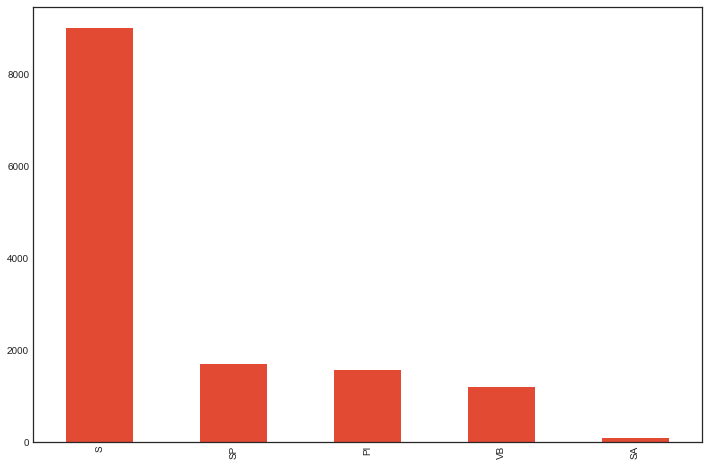

In [370]:
data['Method'].value_counts().plot.bar()
method_percent = data['Method'].value_counts() / len(data['Method'])